# Projeto de Regressão Logística


Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.

Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo no site em minutos.
* 'Age': idade do consumidor.
* 'Area Income': Média da renda do consumidor na região.
* 'Daily Internet Usage': Média em minutos por dia que o consumidor está na internet.
* 'Linha do tópico do anúncio': Título do anúncio.
* 'City': Cidade do consumidor.
* 'Male': Se o consumidor era ou não masculino.
* 'Country': País do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad'': 0 ou 1 indicam se clicou ou não no anúncio.

## Importar bibliotecas

** Importe algumas bibliotecas que você acha que você precisará **

In [1]:
import pandas as pd
import numpy as np
import scipy as ss
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obter dados
** Leia o arquivo advertising.csv e grave-o em um DataFrame chamado ad_data. **

In [89]:
# import data using pandas function read_csv()
ad = pd.read_csv('advertising.csv')

** Verifique o cabeçalho do ad_data **

In [90]:
ad.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


** Use info() e describe() em ad_data **

In [91]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [116]:
ad.shape

(1000, 10)

In [120]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Análise de dados exploratória

Vamos usar Seaborn para explorar os dados!

Tente recriar os gráficos abaixo.

** Crie um histograma de "Age" **

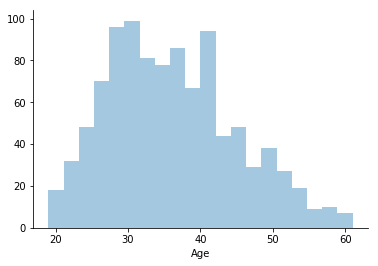

In [112]:
sns.distplot(ad['Age'],
             # do not plot a gaussian kernel density estimate
            kde=False,
            bins=20)

# drop the chart lines
sns.despine()

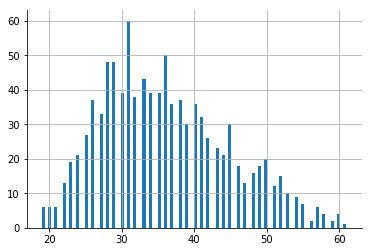

In [115]:
# plotting a chart using matplotlib
ad.Age.hist(bins=100)
sns.despine()

** Crie um jointplot mostrando "Area Income" versus "Age" **

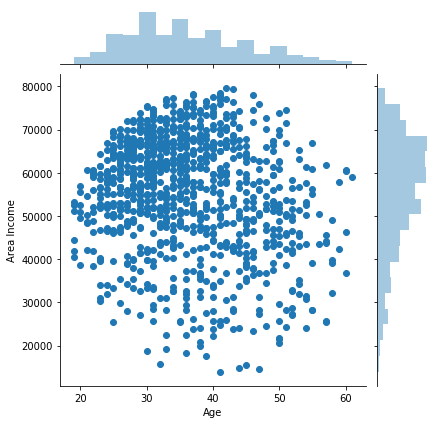

In [100]:
sns.jointplot(ad['Age'],
              ad['Area Income'])

** Crie um jointplot que mostre as distribuições KDE do "Daily Time spent" no site vs "Age". **

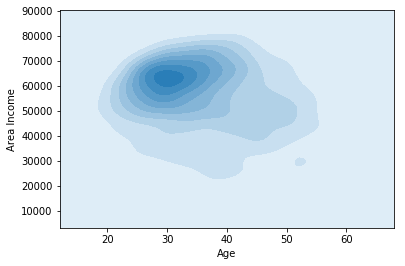

In [129]:
sns.kdeplot(ad['Age'],
            ad['Area Income'],
            shade=True,
            n_levels=10)

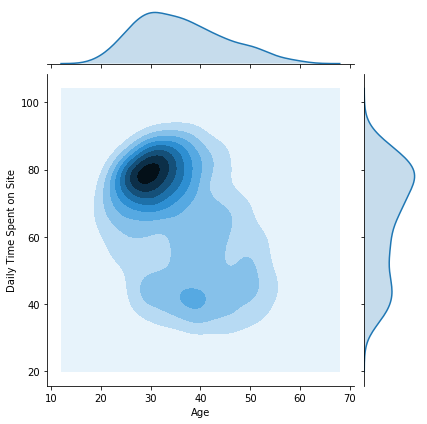

In [26]:
sns.jointplot(ad['Age'],
            ad['Daily Time Spent on Site'],
             kind='kde')

** Crie um jointplot do 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

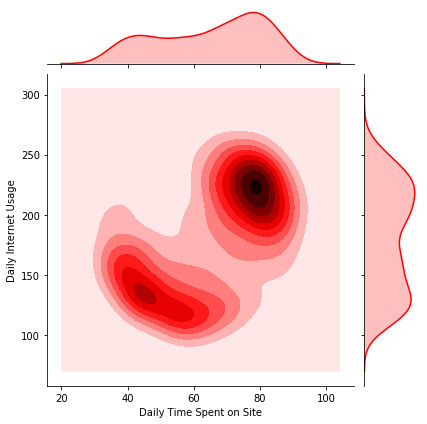

In [124]:
sns.jointplot(ad['Daily Time Spent on Site'],
            ad['Daily Internet Usage'],
             kind='kde',
             color='red')

** Finalmente, crie um parplot com o matiz definido pelo recurso de coluna 'Clicked on Ad'. **

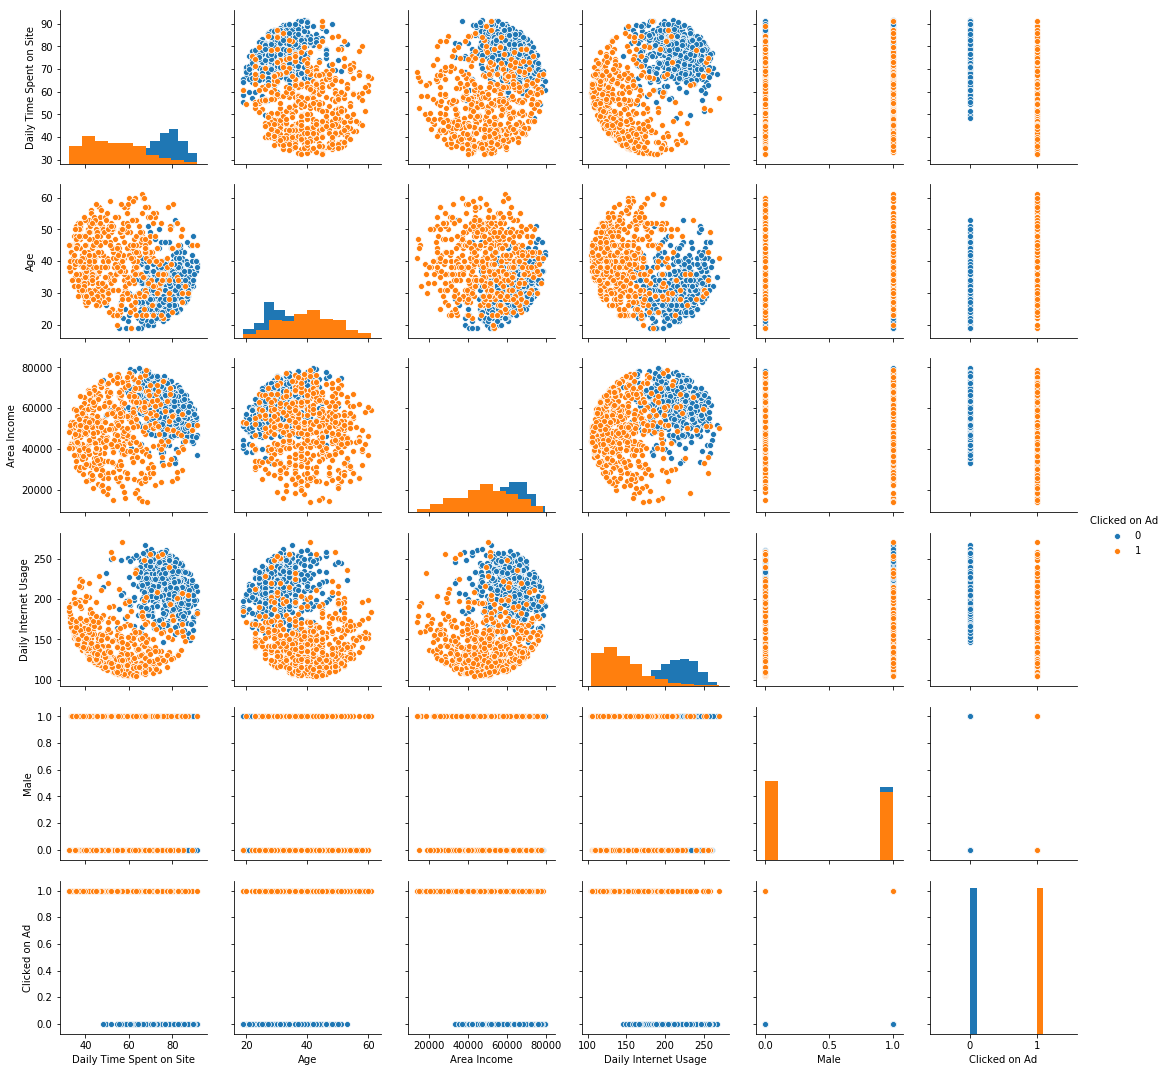

In [92]:
sns.pairplot(ad,
            hue='Clicked on Ad',
            diag_kind='hist')


# Regressão Logística

Agora é hora de quebrar nossos dados em treino e teste e fitar nosso modelo.

Você terá a liberdade aqui para escolher colunas em que deseja treinar!

** Divida os dados em conjunto de treinamento e conjunto de testes usando train_test_split **

In [31]:
from sklearn.model_selection import train_test_split

In [39]:
y = ad['Clicked on Ad']

In [70]:
X = ad[['Area Income', 'Daily Internet Usage']]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

** Treine e ajuste um modelo de regressão logística no conjunto de treinamento. **

In [72]:
from sklearn.linear_model import LogisticRegression


In [73]:
logreg = LogisticRegression()

In [74]:
logreg.fit(X_train,y_train)

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Previsões e avaliações
** Agora preveja valores para os dados de teste. **

In [75]:
y_pred=logreg.predict(X_test)

** Olhe a matriz de confusão **

In [76]:
from sklearn import metrics

In [77]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [78]:
cnf_matrix

array([[109,  19],
       [ 63,  59]])

<Figure size 432x288 with 0 Axes>

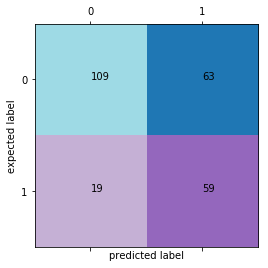

In [146]:
plt.figure()
plt.matshow(cnf_matrix, cmap='tab20')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, cnf_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

* __True Positives (TP)__: (59) we correctly predicted that they do have diabetes
* __True Negatives (TN)__: (109) we correctly predicted that they don't have diabetes
* __False Positives (FP)__: (63) we incorrectly predicted that they do have diabetes
* __False Negatives (FN)__: (15) we incorrectly predicted that they don't have diabetes